# Homework 4

Follow the example in this notebook. The assignment is at the bottom.

First we import the libraries we'll need.

In [11]:
import numpy as np # For almost anything numerical
import pandas as pd  # To read data
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # statistical visualization
%matplotlib inline

Next, set the file location.

In [12]:
myfile ='http://www.buffalo.edu/~erikeina/MDI505/elementdata.csv'

Now we read the csv file.

In [13]:
df = pd.read_csv(myfile)

Take a look at the first few lines to get an idea of what we're working with. 

In [14]:
df.head(10)

,Atomic Number,Symbol,Period,Group,Electronegativity,Calculated Radius,First Ionization,Core Configuration,Heat of Vapor,Covalent Radius,...,Second Ionization,Mass,Van der Waals Radius,Specific Heat,Thermal Cond.,Third Ionization,Series,Electron Affinity,Mohs Hardness,Empirical Radius
0,1,H,1,1,2.2,53,1312,1s1,0.452,37,...,Unknown,1.007940,120,14300,0.1805,Unknown,Nonmetal,72.8,Unknown,25
1,2,He,1,18,Unknown,31,2372.3,1s2,0.083,32,...,5250.5,4.002602,140,5193.1,0.1513,Unknown,Noble Gas,0,Unknown,Unknown
2,3,Li,2,1,0.98,167,520.2,[He] 2s1,147,134,...,7298.1,6.941000,182,3570,85,11815,Alkali Metal,59.6,0.6,145
3,4,Be,2,2,1.57,112,899.5,[He] 2s2,297,90,...,1757.1,9.012182,Unknown,1820,190,14848.7,Alkaline Earth Metal,0,5.5,105
4,5,B,2,13,2.04,87,800.6,[He] 2s2 2p1,507,82,...,2427.1,10.811000,Unknown,1030,27,3659.7,Metalloid,26.7,9.3,85
5,6,C,2,14,2.55,67,1086.5,[He] 2s2 2p2,715,77,...,2352.6,12.010700,170,710,140,4620.5,Nonmetal,153.9,0.5,70
6,7,N,2,15,3.04,56,1402.3,[He] 2s2 2p3,2.79,75,...,2856,14.006700,155,1040,0.02583,4578.1,Nonmetal,7,Unknown,65
7,8,O,2,16,3.44,48,1313.9,[He] 2s2 2p4,3.41,73,...,3388.3,15.999400,152,919,0.02658,5300.5,Nonmetal,141,Unknown,60
8,9,F,2,17,3.98,42,1681,[He] 2s2 2p5,3.27,71,...,3374.2,18.998403,147,824,0.0277,6050.4,Halogen,328,Unknown,50
9,10,Ne,2,18,Unknown,38,2080.7,[He] 2s2 2p6,1.75,69,...,3952.3,20.179700,154,1030,0.0491,6122,Noble Gas,0,Unknown,Unknown


Ok, there's a lot here. Let's get some more info.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 31 columns):
Atomic Number           118 non-null int64
Symbol                  118 non-null object
Period                  118 non-null int64
Group                   118 non-null int64
Electronegativity       118 non-null object
Calculated Radius       118 non-null object
First Ionization        118 non-null object
Core Configuration      118 non-null object
Heat of Vapor           118 non-null object
Covalent Radius         118 non-null object
Heat of Fusion          118 non-null object
Bulk Modulus            118 non-null object
Boiling Point           118 non-null object
Brinell Hardness        118 non-null object
Melting Point           118 non-null object
STP Density             118 non-null object
Young Modulus           118 non-null object
Shear Modulus           118 non-null object
Vickers Hardness        118 non-null object
Name                    118 non-null object
Common Ions       

Most of the columns are classified as "objects" instead of numerical values. In the head we saw many values listed as "Unknown". Let's replace these with NaN (not a number) to make it easier to process.

In [16]:
df = df.replace('Unknown', np.nan)

Now we can convert the columns to numeric. However, not all columns should be numeric (like "Symbol"), so let's ignore any errors. The alternative would be to force the values to become numeric (using `errors='coerce'`, which we don't want to do.

In [17]:
df = df.apply(pd.to_numeric, errors='ignore')

Next, let's see how the entries are related by computing a correlation matrix.

In [18]:
corr=df.corr()

We can visualize the correlation matrix by plotting as a heatmap.

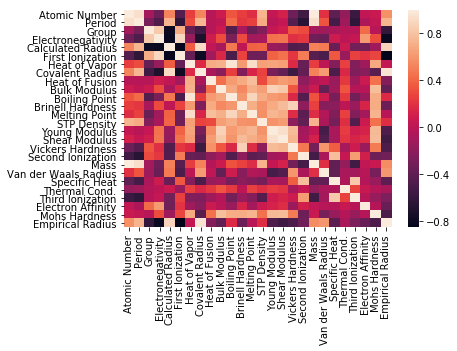

In [19]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

If we sort the correlation matrix by a value, we can get a list of most to least strongly correlated to that value. Let's try that for Atomic Number.

In [20]:
corr_sort_AtomicNumber=df.corr().sort_values('Atomic Number', ascending=False).index
list(corr_sort_AtomicNumber)

['Atomic Number',
 'Mass',
 'Period',
 'STP Density',
 'Empirical Radius',
 'Covalent Radius',
 'Calculated Radius',
 'Boiling Point',
 'Brinell Hardness',
 'Heat of Vapor',
 'Van der Waals Radius',
 'Melting Point',
 'Shear Modulus',
 'Bulk Modulus',
 'Mohs Hardness',
 'Young Modulus',
 'Electron Affinity',
 'Heat of Fusion',
 'Group',
 'Thermal Cond.',
 'Electronegativity',
 'Vickers Hardness',
 'Specific Heat',
 'First Ionization',
 'Second Ionization',
 'Third Ionization']

Ignoring the first value (itself), the value most strongly correlated with Atomic Number is Mass. Let's compare those. The seaborn function `lmplot` will combine a plot with a linear model. 

C:\Users\He\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


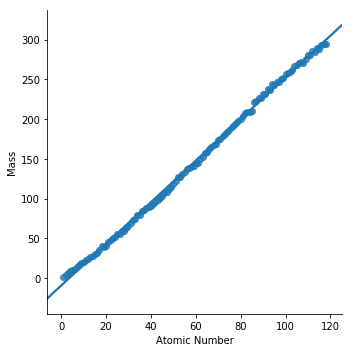

In [33]:
sns.lmplot(x='Atomic Number',y='Mass',data=df)

This relationship is nearly linear. We should have expected this result, because a larger atomic number means more protons, which means more mass.

## Assignment

What other relations are there? Explore this dataset by plotting other correlations. For example, there are two hardness values (Brinell and Vickers); how are these correlated? How are they related to properties like Young's modulus or melting point? What trends go across groups or down periods of the periodic table?

You don't have to answer the above questions, but your assignment is as follows:
 - Find a correlation based on a different entry (i.e., not Atomic Number)
 - Plot the correlation (facet or group into subplots as necessary).
 - Explain the reason behind the relation you've found.

C:\Users\He\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


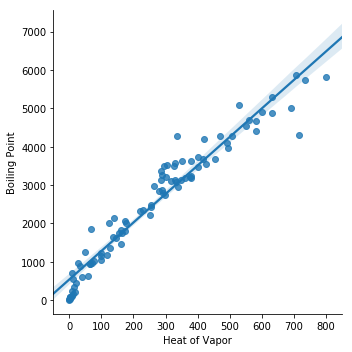

In [43]:
sns.lmplot(y='Boiling Point',x='Heat of Vapor',data=df)

Heat of vapor is the amount of energy (enthalpy) that must be added to a liquid substance to transform a quantity of that substance into a gas. Boiling point is the temperature at which the vapor pressure of the liquid equals the pressure surrounding the liquid and the liquid changes into a vapor.

These two kind of physical quantities both mainly depend on the Van der Waals force between molecules. As a result, the change of boling point against heat vapour looks close to linear.